<a href="https://colab.research.google.com/github/ichencyj/AI_ML/blob/main/cnn0704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [11]:
# 如果mnist資料集要使用cnn, (60000, 28, 28, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [12]:
#按著鍵盤alt(option)點點點, 一起打引號
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是: airplane


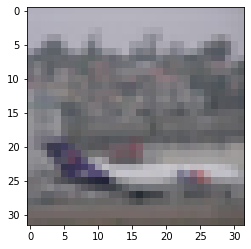

In [13]:
import matplotlib.pyplot as plt
idx = 30000
print("答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dense, Flatten
# layers = [
#     # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
#     Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
#     MaxPooling2D(),
#     # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
#     Conv2D(128, 3, padding="same", activation="relu"),
#     MaxPooling2D(),
#     Conv2D(256, 3, padding="same", activation="relu"),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(128, activation="relu"),
#     Dense(10, activation="softmax")
# ]
# model = Sequential(layers)
# model.summary()

In [14]:
# GAP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

In [15]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [16]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [17]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 5s - loss: 1.6619 - accuracy: 0.3849 - val_loss: 1.3529 - val_accuracy: 0.4998 - 5s/epoch - 22ms/step
Epoch 2/50
225/225 - 4s - loss: 1.2300 - accuracy: 0.5582 - val_loss: 1.0905 - val_accuracy: 0.6104 - 4s/epoch - 20ms/step
Epoch 3/50
225/225 - 4s - loss: 1.0101 - accuracy: 0.6408 - val_loss: 0.9419 - val_accuracy: 0.6726 - 4s/epoch - 19ms/step
Epoch 4/50
225/225 - 4s - loss: 0.8615 - accuracy: 0.6965 - val_loss: 0.8123 - val_accuracy: 0.7154 - 4s/epoch - 20ms/step
Epoch 5/50
225/225 - 4s - loss: 0.7540 - accuracy: 0.7360 - val_loss: 0.7366 - val_accuracy: 0.7472 - 4s/epoch - 20ms/step
Epoch 6/50
225/225 - 4s - loss: 0.6624 - accuracy: 0.7672 - val_loss: 0.7298 - val_accuracy: 0.7514 - 4s/epoch - 19ms/step
Epoch 7/50
225/225 - 4s - loss: 0.5869 - accuracy: 0.7960 - val_loss: 0.6986 - val_accuracy: 0.7620 - 4s/epoch - 20ms/step
Epoch 8/50
225/225 - 5s - loss: 0.5194 - accuracy: 0.8199 - val_loss: 0.6545 - val_accuracy: 0.7700 - 5s/epoch - 20ms/step
Epoch 9/50
225/2

In [18]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6805 - accuracy: 0.7654


[0.6804681420326233, 0.7653999924659729]

In [19]:
pre = model.predict(x_test_norm).argmax(axis=-1)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)

(10000,)
(10000, 1)
(10000,)


In [20]:
# 雙方向(axis=1)
# 在tf用y_test_cat(十個機率), 出tf用y_test(確實答案)
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),856,10,13,10,23,8,2,7,51,20
automobile(真實),25,847,5,13,4,8,2,2,27,67
bird(真實),88,1,678,43,102,46,16,12,8,6
cat(真實),27,2,78,531,102,196,24,20,11,9
deer(真實),15,1,60,30,833,24,4,26,7,0
dog(真實),20,3,47,98,56,725,7,31,8,5
frog(真實),6,2,80,84,83,37,690,2,10,6
horse(真實),19,0,37,27,83,54,2,768,1,9
ship(真實),47,15,7,11,6,6,1,2,892,13
truck(真實),36,56,6,18,2,11,4,10,23,834


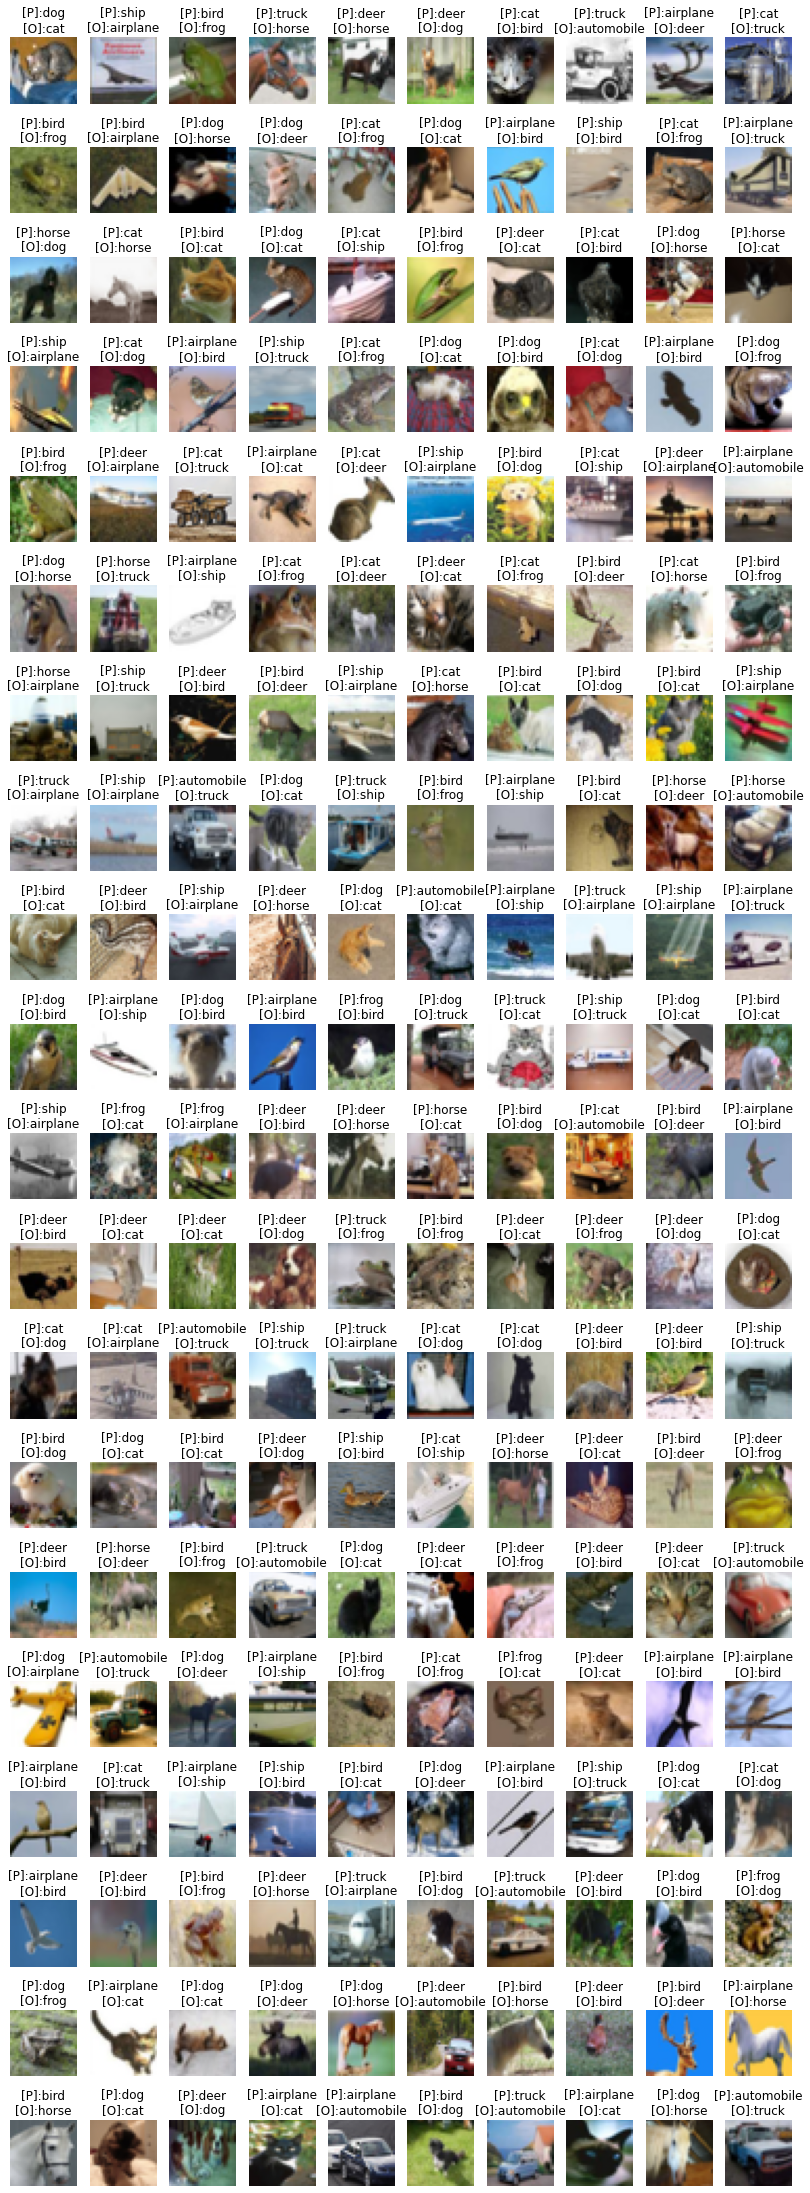

In [21]:
import numpy as np
# 預測不對的idx
# 太多了, 所以我取兩百筆就好
idx = np.nonzero(pre != y_test_r)[0][:200]
# 預測不對的圖的正確答案
pre_false_label = y_test_r[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[pre_false_pred[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

網址:https://cw-image-resizer.cwg.tw/resize/uri/https%3A%2F%2Fcw1.tw%2FCW%2Fimages%2Farticle%2F201708%2Farticle-598d1b33a34a9.jpg/?w=1600&format=webp


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.9747
automobile 的機率: 0.0
bird 的機率: 0.0005
cat 的機率: 0.0
deer 的機率: 0.0024
dog 的機率: 0.0
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0225
truck 的機率: 0.0


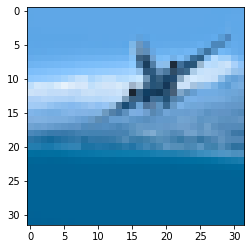

In [23]:
# PIL: pillow
import requests
from PIL import Image 
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
# 當初怎麼進去, 現在就要怎麼進去, 所以 (32, 32, 3) 和 (1, 32, 32, 3) 是不一樣的
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
prob = model.predict(img_np)[0]
for t, p in zip(trans, prob):
    print(t, "的機率:", round(p, 4))
plt.imshow(img)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from tensorflow.keras.models import load_model
# 手動存檔: model.save("cnn.h5")
# 讀取模型: load_model("cnn.h5")
# 不用再compile, 可以繼續fit/predict/evaluate
model.save("/content/drive/MyDrive/AI資料/ML/cnn.h5")

In [26]:
import os
modelpath = "/content/drive/MyDrive/AI資料/ML/cnn.h5"
if not os.path.exists(modelpath):
    print("創造...")
    layers = [
        Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
        MaxPooling2D(),
        Conv2D(128, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(256, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(512, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        GlobalAveragePooling2D(),
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])
else:
    print("讀取...")
    model = load_model(modelpath)
model.summary()

讀取...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256) 